## Titanic Dataset

The dataset containing  information about passengers on the Titanic, including features such as age, sex, ticket class, number of siblings/spouses aboard, number of parents/children aboard, fare, and more, the task is to build a predictive model that can accurately classify whether a passenger survived (1) or did not survive (0) 

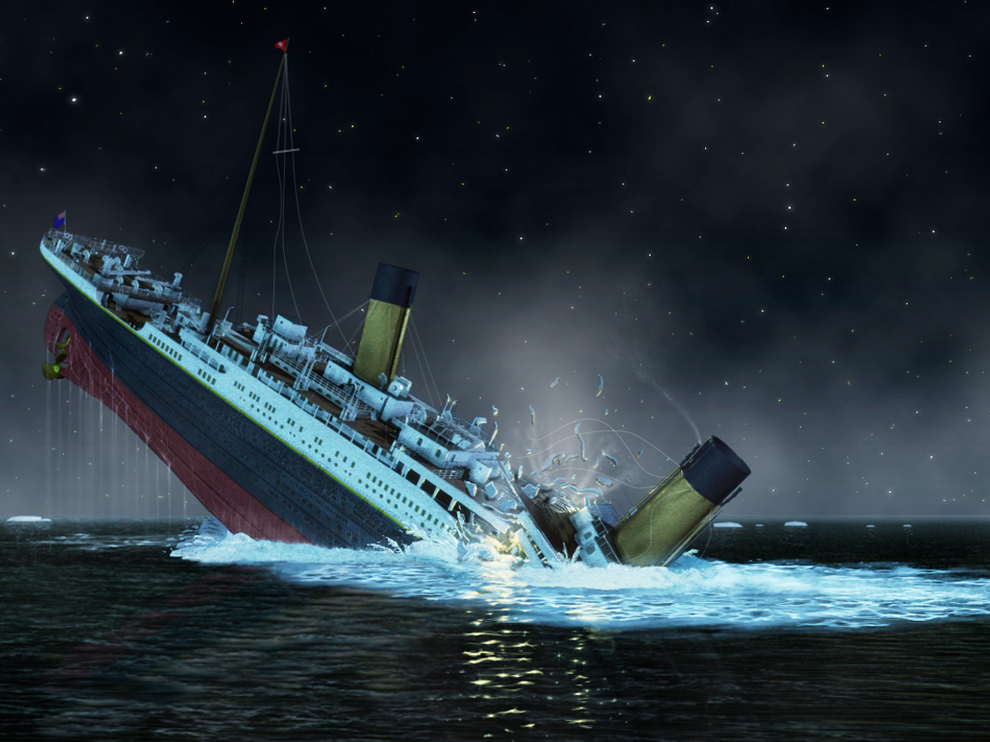

Below is a brief information about each columns of the dataset:

1. **PassengerId:** An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.

2. **Survived:** Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

3. **Pclass:** Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

4. **Name:** Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

5. **Sex:** Passenger's sex. It's either Male or Female.

6. **Age:** Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

7. **SibSp:** Number of siblings or spouses travelling with each passenger.
8. **Parch:** Number of parents of children travelling with each passenger.
9. **Ticket:** Ticket number.
10. **Fare:** How much money the passenger has paid for the travel journey.
11. **Cabin:** Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.
12. **Embarked:** Port from where the particular passenger was embarked/boarded.

### Step 1:- Importing Necessary Libraries

In [46]:
# loading the Basic libraries

import pandas as pd                                     # To work on data manipulation 
import numpy as np                                      # It is used for numerical python
import seaborn as sns                                   # For Visualization
import matplotlib.pyplot as plt                         # For Visualization
from warnings import filterwarnings
filterwarnings('ignore')

In [47]:
# Importing the Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

### Step 2:- Loading Dataset

In [48]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [49]:
print(train.shape,test.shape)

(891, 12) (418, 11)


#### Explore the Dataset for better understanding 

In [50]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
bin = [0,20,40,60,81]
label = ['child','younger','FM','LE']
train['Age_Group'] = pd.cut(train.Age,bins = bin,labels=label,right = False)

In [20]:
train.Age_Group.value_counts(normalize = True) * 100

Age_Group
younger    54.201681
child      22.969188
FM         19.187675
LE          3.641457
Name: proportion, dtype: float64

In [14]:

train.sample(10,random_state= 100)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,child
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q,child
821,822,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,NaN,S,younger
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S,FM
795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S,younger
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,younger
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S,child
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S,FM
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S,younger
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S,NaN


In [21]:

train.drop('Age_Group',axis = 1,inplace=True)


In [53]:
train.Survived.value_counts(normalize = True)*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

In [54]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,younger
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,younger


In [55]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [11]:
print(train.shape,test.shape)


(891, 12) (418, 11)


In [56]:

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
train[train.Fare == train.Fare.max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,younger
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,younger
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,younger


In [58]:
train[train.Fare == 263.0000]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,child
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S,younger
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S,younger
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,LE


In [59]:
train.Fare.sort_values(ascending = False).head(20)

258    512.3292
737    512.3292
679    512.3292
88     263.0000
27     263.0000
341    263.0000
438    263.0000
311    262.3750
742    262.3750
118    247.5208
299    247.5208
557    227.5250
700    227.5250
380    227.5250
716    227.5250
527    221.7792
377    211.5000
730    211.3375
779    211.3375
689    211.3375
Name: Fare, dtype: float64

<Axes: xlabel='Fare'>

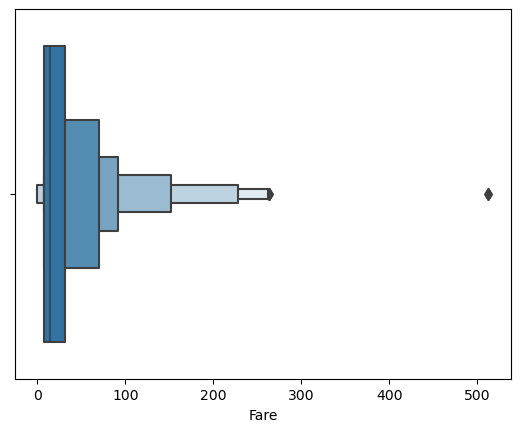

In [60]:
sns.boxenplot(x = train.Fare)

In [61]:
train[train.Fare == 0]['Survived'].value_counts(normalize = True)*100

Survived
0    93.333333
1     6.666667
Name: proportion, dtype: float64

In [62]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_Group      177
dtype: int64

*describe(include = ['O'])* will show the descriptive statistics of object data types.

In [63]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [64]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [65]:
sns.load_dataset('titanic')['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

This shows that there are duplicate *Ticket number* and *Cabins* shared, this information got by seeing freq row. The highest number of duplicate ticket number is "347082". It has been repeated 7 times. Similarly, the highest number of people using the same cabin is 4. They are using cabin number "B96 B98".

We also see that 644 people were embarked from port "S".

Among 891 rows, 577 were Male and the rest were Female.

We can justify by using count, unique,top,freq

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Age_Group    714 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


We can see that *Age* value is missing for many rows. 

Out of 891 rows, the *Age* value is present only in 714 rows.

Similarly, *Cabin* values are also missing in many rows. Only 204 out of 891 rows have *Cabin* values.

similarly, Embarked value are also missing in some rows.
889 rows out of 891 rows 

In [71]:

train_null_vals = train.isnull().sum()
train_null_vals[train_null_vals > 0]

Age          177
Cabin        687
Embarked       2
Age_Group    177
dtype: int64

In [72]:
test_miss_vals = test.isnull().sum()
test_miss_vals[test_miss_vals>0]

Age       86
Fare       1
Cabin    327
dtype: int64

There are 177 rows with missing *Age*, 687 rows with missing *Cabin* and 2 rows with missing *Embarked* information.

### Now will check for test dataset

In [73]:
test.shape

(418, 11)

*Survived* column is not present in Test data.
We have to train our classifier using the Train data and generate predictions (*Survived*) on Test data.

In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


There are missing entries for *Age* in Test dataset as well.

Out of 418 rows in Test dataset, only 332 rows have *Age* value.

*Cabin* values are also missing in many rows. Only 91 rows out ot 418 have values for *Cabin* column.

In [150]:
test_miss_vals = test.isnull().sum()
test_miss_vals[test_miss_vals>0]

Series([], dtype: int64)

There are 86 rows with missing *Age*, 327 rows with missing *Cabin* and 1 row with missing *Fare* information.

### check for duplicates 

In [76]:
train[train.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group


In [77]:
test[test.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


There is no duplicated records in training and testing set

## Relationship between Features and Survival

In this section, we analyze relationship between different features with respect to *Survival*. We see how different feature values show different survival chance. We also plot different kinds of diagrams to **visualize** our data and findings.

In [78]:
train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [79]:
train.Survived.value_counts(normalize=True)*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

The data set has slightly imbalanced but its fine we can use it.
1. Balanced Dataset :- Each class has same propotion of distribution           
2. Slightly Imbalanced Dataset:- class distribution is roughly 60-40, 70-30, or even 80-20, depending on the problem.                 
3. Imbalanced Dataset:- When the class distribution is highly skewed, such as 90-10, 95-5, or even more extreme imbalances.          


<Axes: xlabel='Survived', ylabel='count'>

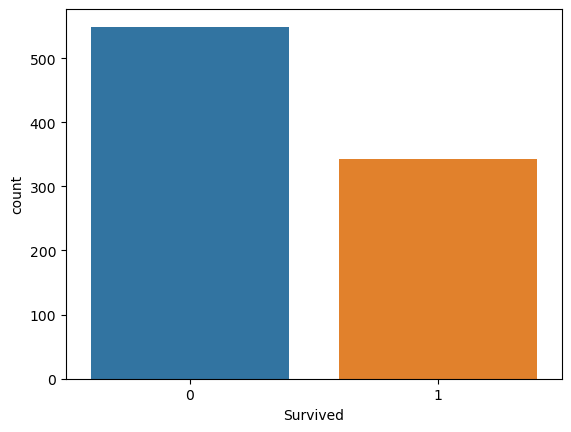

In [80]:
sns.countplot(x = train.Survived)

### Pclass vs. Survival

Higher class passengers have better survival chance.

In [81]:
train.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [82]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [83]:
train[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [84]:
train.groupby('Pclass')['Survived'].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [85]:
train.groupby('Pclass')[['Survived','Fare']].mean()

,Survived,Fare
Pclass,,
1,0.629630,84.154687
2,0.472826,20.662183
3,0.242363,13.675550


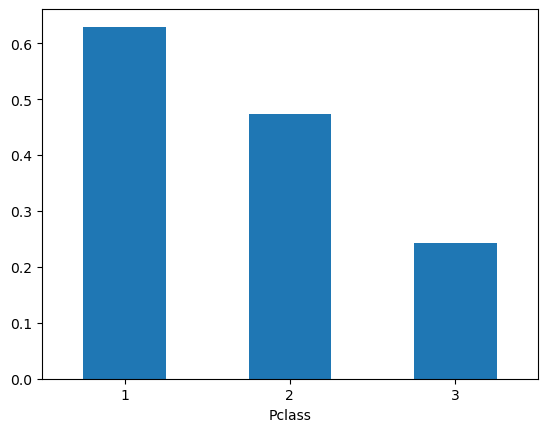

In [86]:
train.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

# Sex vs Survival
Females has better survival chance.

In [87]:
display(train.shape[0])
train.Sex.value_counts(normalize = True)*100

891

Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

In [88]:
train.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [89]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [90]:
train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [91]:
train.groupby('Sex')['Survived'].mean()*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

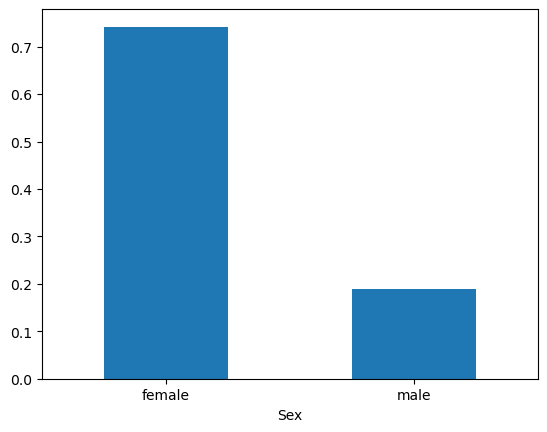

In [92]:
train.groupby('Sex').Survived.mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

#### Now will perform multi-variate analysis using Pclass & Sex vs Survival

### Pclass & Sex vs Survival

Below, we just find out how many males and females are there in each *Pclass*. We then plot a stacked bar diagram with that information. We found that there are more males among the 3rd Pclass passengers.

In [93]:
tab = pd.crosstab(train['Pclass'],train['Sex'])
tab

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [94]:
tab.sum(0)

Sex
female    314
male      577
dtype: int64

In [95]:
tab.sum(1)

Pclass
1    216
2    184
3    491
dtype: int64

In [96]:
pd.crosstab(index = [train.Survived,train.Pclass], columns = [train.Sex])

Sex              female  male
Survived Pclass              
0        1            3    77
         2            6    91
         3           72   300
1        1           91    45
         2           70    17
         3           72    47

In [97]:
94/216

0.4351851851851852

In [98]:
tab.sum(1)

Pclass
1    216
2    184
3    491
dtype: int64

In [99]:
tab.sum(0)

Sex
female    314
male      577
dtype: int64

In [100]:
tab.div(tab.sum(1),)

,female,male,1,2,3
Pclass,,,,,
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN


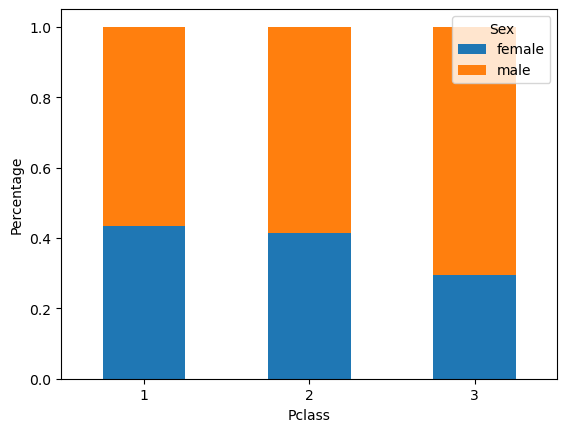

In [101]:
tab.div(tab.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,)
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.show()

In [102]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,younger
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,younger


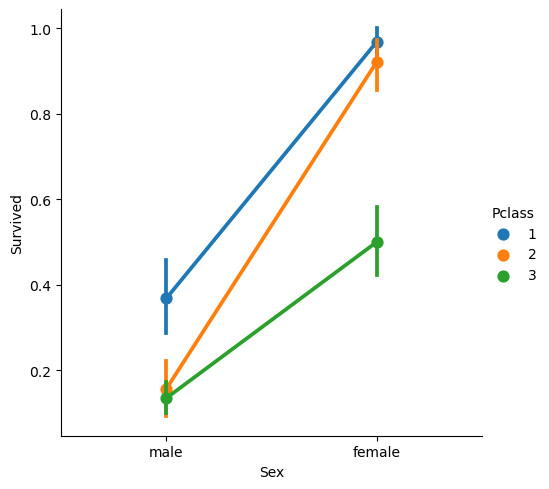

In [195]:
sns.catplot(x = 'Sex',y = 'Survived',hue='Pclass',kind = 'point',data=train)

From the above plot, it can be seen that:
- Women from 1st and 2nd Pclass have almost 100% survival chance. 
- Men from 2nd and 3rd Pclass have only around 10% survival chance.

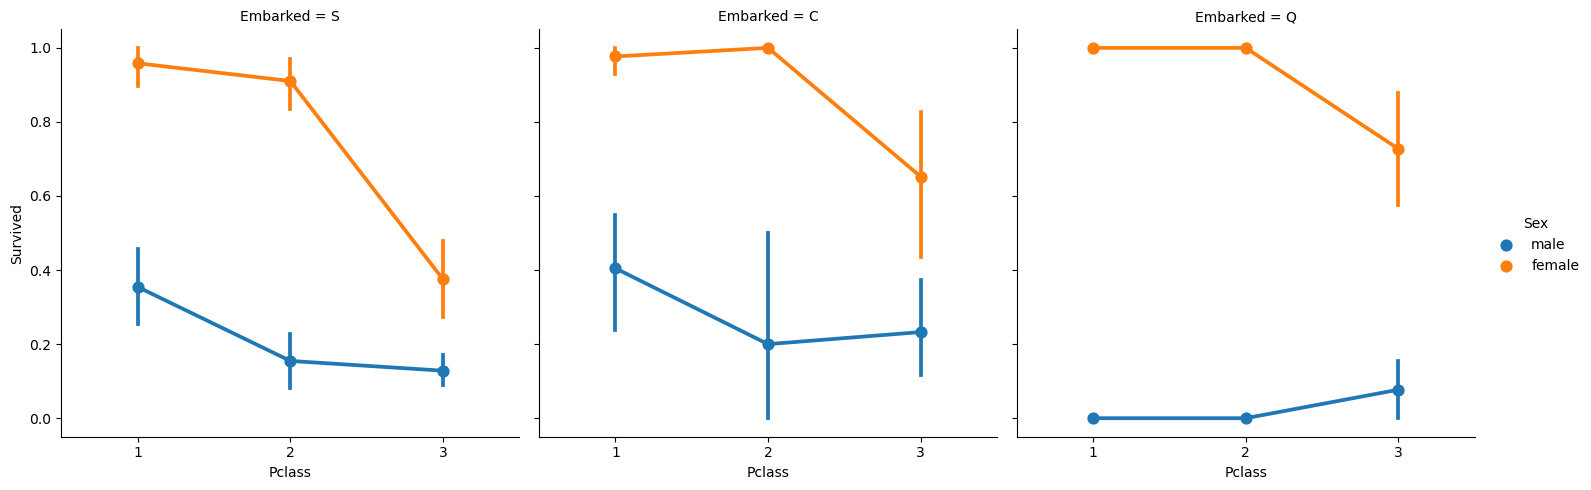

In [42]:
sns.catplot(x = 'Pclass',y = 'Survived',hue='Sex',col = 'Embarked',kind = 'point',data=train)

In [104]:
33/(33+55 )

0.375

In [105]:
61/67

0.9104477611940298

In [106]:
1 - 2/46

0.9565217391304348

In [107]:
pd.crosstab(index = [train.Survived,train.Pclass,train.Embarked], columns = [train.Sex])

Sex                       female  male
Survived Pclass Embarked              
0        1      C              1    25
                Q              0     1
                S              2    51
         2      C              0     8
                Q              0     1
                S              6    82
         3      C              8    33
                Q              9    36
                S             55   231
1        1      C             42    17
                Q              1     0
                S             46    28
         2      C              7     2
                Q              2     0
                S             61    15
         3      C             15    10
                Q             24     3
                S             33    34

In [108]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Group'],
      dtype='object')

From the above plot, it can be seen that:
- Almost all females from Pclass 1 and 2 survived.
- Females dying were mostly from 3rd Pclass.
- Males from Pclass 1 only have slightly higher survival chance than Pclass 2 and 3.

### Embarked vs Survived

In [109]:
train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [110]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64

In [111]:
train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


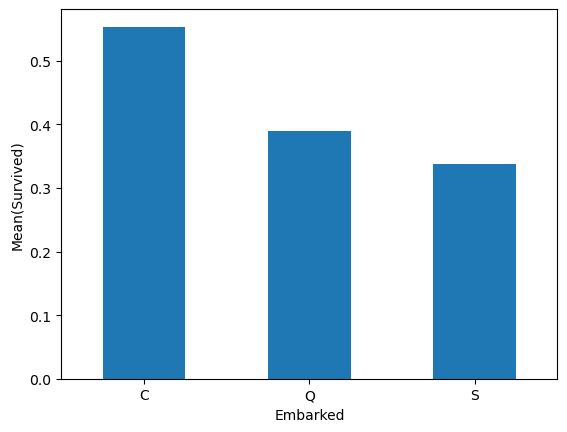

In [112]:
train.groupby('Embarked').Survived.mean().plot(kind='bar')
plt.ylabel('Mean(Survived)')
plt.xticks(rotation=0)
plt.show()

### Parch vs. Survival

In [113]:
train.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [114]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: count, dtype: int64

In [115]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


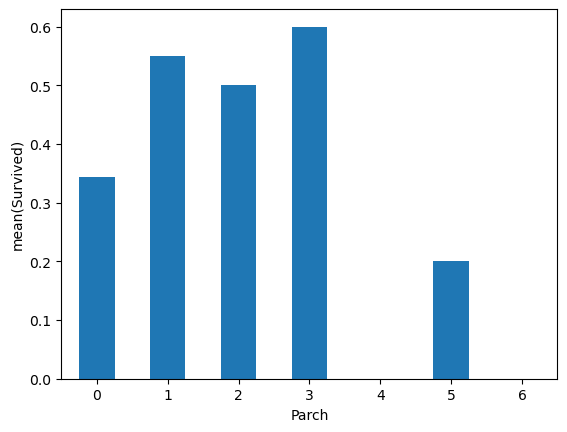

In [116]:
train.groupby('Parch').Survived.mean().plot(kind='bar')
plt.ylabel('mean(Survived)')
plt.xticks(rotation=0)
plt.show()

### SibSp vs. Survival

In [117]:
train.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [118]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: count, dtype: int64

In [119]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


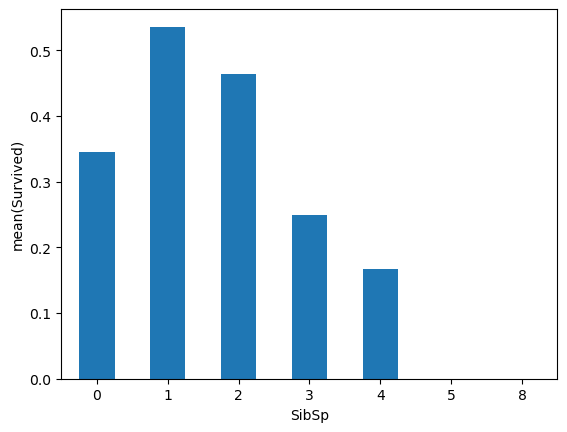

In [120]:
train.groupby('SibSp').Survived.mean().plot(kind='bar')
plt.ylabel('mean(Survived)')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Sex', ylabel='Age'>

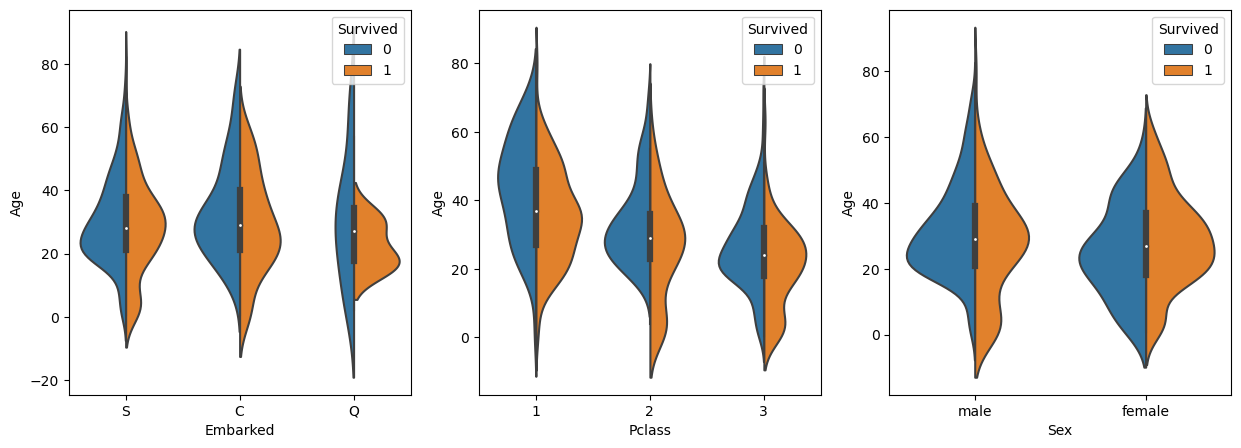

In [121]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=ax3)


In [122]:
train.Age[train.Age<0]

Series([], Name: Age, dtype: float64)

From *Pclass* violinplot, we can see that:
- 1st Pclass has very few children as compared to other two classes.
- 1st Plcass has more old people as compared to other two classes.
- Almost all children (between age 0 to 10) of 2nd Pclass survived.
- Most children of 3rd Pclass survived.
- Younger people of 1st Pclass survived as compared to its older people.

From *Sex* violinplot, we can see that:
- Most male children (between age 0 to 14) survived.
- Females with age between 18 to 40 have better survival chance.

From *Embarked* Violinplot, we can see that:
- Almost all the Passengers from Embarked Q (Age greater than 40) has low survival rate

### Correlating Features

In [123]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,younger
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,younger


In [126]:
plt.figure(figsize=(15,6))
sns.heatmap(train.drop(['PassengerId','Name','Sex','Ticket','Cabin','Embarked'],axis=1).corr(),vmax=0.6,square=True,annot=True)

ValueError: could not convert string to float: 'younger'

<Figure size 1500x600 with 0 Axes>

In [128]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,younger
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,younger


In [129]:
train_dup = train.copy()

In [130]:
test_dup = test.copy()

### Droping Irrelevent columns

In [131]:
train.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [132]:
test.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [133]:
null_counts = train.isnull().sum()
null_counts[null_counts>0]

Age          177
Cabin        687
Embarked       2
Age_Group    177
dtype: int64

In [119]:
train.shape

(891, 10)

In [120]:
687/891

0.7710437710437711

#### Cabin has more than 75% of null values, In the dataset if we have more than 75% of null values it doesn't provide significant information for prediction so its better to drop those features

In [134]:
train.drop('Cabin',axis =1,inplace=True)

In [135]:
test.drop('Cabin',axis =1,inplace=True)

### Imputing the null values present in the Age and Embarked column

<Axes: ylabel='Frequency'>

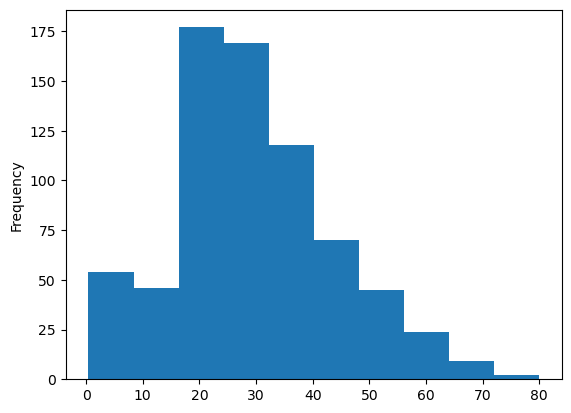

In [136]:
train.Age.plot(kind = 'hist')

### we can see that the age is normaly distributed, so we can go with mean imputation

In [137]:
round(train['Age'].mean(),0)

30.0

In [138]:
train['Age'].median()

28.0

In [139]:
train['Age'] = train.Age.fillna(round(train.Age.mean(),0))

In [140]:
print(train.Age.min(),train.Age.max())

0.42 80.0


### SibSp & Parch Feature

Combining *SibSp* & *Parch* feature, we create a new feature named *FamilySize*.

In [141]:
train['FamilySize'] = train['SibSp']+train.Parch + 1

In [142]:
train[['FamilySize','Survived']].groupby(['FamilySize'], as_index = False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


data shows that: 

- Having *FamilySize* upto 4 (from 2 to 4) has better survival chance. 
- *FamilySize = 1*, i.e. travelling alone has less survival chance.
- Large *FamilySize* (size of 5 and above) also have less survival chance.

### Now will perform some encoding technique

In [142]:
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [154]:
train.drop('FamilySize',axis = 1,inplace = True)

KeyError: "['FamilySize'] not found in axis"

In [155]:
display(train.shape)
display(test.shape)

(891, 10)

(418, 7)

In [156]:
test.drop('Name',axis = 1,inplace = True)

KeyError: "['Name'] not found in axis"

In [181]:
train.drop('Name',axis = 1,inplace = True)
train.drop('Age_Group',axis = 1,inplace = True)

KeyError: "['Name'] not found in axis"

In [161]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [158]:
train.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Age_Group    177
dtype: int64

In [159]:
train.Embarked.mode()[0]

'S'

In [182]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,30.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [146]:
train.Embarked.fillna(train.Embarked.mode()[0],inplace = True)

In [201]:
new_train = pd.get_dummies(train,drop_first=True).astype('int')
new_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22,1,0,7,1,0,1
1,1,1,38,1,0,71,0,0,0
2,1,3,26,0,0,7,0,0,1
3,1,1,35,1,0,53,0,0,1
4,0,3,35,0,0,8,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13,1,0,1
887,1,1,19,0,0,30,0,0,1
888,0,3,30,1,2,23,0,0,1
889,1,1,26,0,0,30,1,0,0


In [148]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [198]:
test.Age.fillna(test.Age.mean(),inplace = True)
test.Fare.fillna(test.Fare.median(),inplace = True)

In [161]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [200]:
new_test = pd.get_dummies(test,drop_first=True).astype('int')
new_test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34,0,0,7,1,1,0
1,3,47,1,0,7,0,0,1
2,2,62,0,0,9,1,1,0
3,3,27,0,0,8,1,0,1
4,3,22,1,1,12,0,0,1
...,...,...,...,...,...,...,...,...
413,3,30,0,0,8,1,0,1
414,1,39,0,0,108,0,0,0
415,3,38,0,0,7,1,0,1
416,3,30,0,0,8,1,0,1


In [167]:
display(train.shape)
display(test.shape)

(891, 8)

(418, 7)

In [168]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [169]:
X = new_train.drop('Survived',axis=1)
y = new_train['Survived']

In [170]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,random_state=0)

In [183]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)
display(confusion_matrix(y_train,y_train_pred))
display(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

array([[83, 14],
       [15, 66]], dtype=int64)

array([[361,  91],
       [ 64, 197]], dtype=int64)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        97
           1       0.82      0.81      0.82        81

    accuracy                           0.84       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.84      0.84      0.84       178

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       452
           1       0.68      0.75      0.72       261

    accuracy                           0.78       713
   macro avg       0.77      0.78      0.77       713
weighted avg       0.79      0.78      0.78       713



In [171]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [172]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [173]:
y_train

696    0
621    1
461    0
598    0
139    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 178, dtype: int32

In [174]:
y_train_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0])

In [175]:
model.predict_proba(X_train)

array([[0.93884644, 0.06115356],
       [0.56368711, 0.43631289],
       [0.9079838 , 0.0920162 ],
       [0.87339905, 0.12660095],
       [0.29891657, 0.70108343],
       [0.80093513, 0.19906487],
       [0.12215387, 0.87784613],
       [0.19497197, 0.80502803],
       [0.54146273, 0.45853727],
       [0.82188135, 0.17811865],
       [0.89196212, 0.10803788],
       [0.35098308, 0.64901692],
       [0.30510061, 0.69489939],
       [0.43191095, 0.56808905],
       [0.83506404, 0.16493596],
       [0.05436864, 0.94563136],
       [0.57817696, 0.42182304],
       [0.96747711, 0.03252289],
       [0.56840845, 0.43159155],
       [0.76414347, 0.23585653],
       [0.94974847, 0.05025153],
       [0.8922546 , 0.1077454 ],
       [0.89210844, 0.10789156],
       [0.89892983, 0.10107017],
       [0.89210844, 0.10789156],
       [0.18127051, 0.81872949],
       [0.85238764, 0.14761236],
       [0.80093513, 0.19906487],
       [0.39950382, 0.60049618],
       [0.17767929, 0.82232071],
       [0.

In [176]:
confusion_matrix(y_train_pred,y_train)

array([[83, 15],
       [14, 66]], dtype=int64)

In [177]:
confusion_matrix(y_test_pred,y_test)

array([[361,  64],
       [ 91, 197]], dtype=int64)

In [178]:
66/(66+15)

0.8148148148148148

In [179]:
y_train.value_counts()

Survived
0    97
1    81
Name: count, dtype: int64

In [180]:
print(classification_report(y_train_pred,y_train))
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85        98
           1       0.81      0.82      0.82        80

    accuracy                           0.84       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.84      0.84      0.84       178

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       425
           1       0.75      0.68      0.72       288

    accuracy                           0.78       713
   macro avg       0.78      0.77      0.77       713
weighted avg       0.78      0.78      0.78       713



In [131]:
cols = pd.get_dummies(train[['Sex','Embarked']],drop_first = True).astype('int')

In [132]:
cols

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [79]:
final_train = pd.concat([train,cols],axis=1)

In [80]:
final_train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,0,0


In [81]:
test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S


In [82]:
colstest = pd.get_dummies(test[['Sex','Embarked']],drop_first = True).astype('int')

In [83]:
final_test = pd.concat([test,colstest],axis=1)

In [84]:
final_test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,0,1


### Now will keep only required feature for building the model

In [85]:
final_train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,0,0


In [86]:
X = final_train.drop(['Name','Sex','Embarked','FamilySize','Survived'],axis=1)

In [87]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [88]:
y = final_train['Survived']

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [90]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(623, 8) (268, 8) (623,) (268,)


In [91]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [92]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
114,3,17.0,0,0,14.4583,0,0,0
874,2,28.0,1,0,24.0000,0,0,0
76,3,30.0,0,0,7.8958,1,0,1
876,3,20.0,0,0,9.8458,1,0,1
674,2,30.0,0,0,0.0000,1,0,1


In [93]:
# Predicting for training and testing 
ytrain_pred = clf.predict(X_train)
ytest_pred = clf.predict(X_test)

In [94]:
# Model Evaluation

train_score = clf.score(X_train,y_train)
test_score = clf.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 0.81, Testing Score 0.78


In [95]:
y_train.shape

(623,)

In [96]:
347+49+65+162

623

In [97]:
(347+162)/623

0.8170144462279294

In [98]:
confusion_matrix(y_train,ytrain_pred)

array([[347,  49],
       [ 67, 160]], dtype=int64)

In [99]:
y_test.shape

(268,)

In [100]:
(128+79)/268

0.7723880597014925

In [101]:
confusion_matrix(y_test,ytest_pred)

array([[130,  23],
       [ 35,  80]], dtype=int64)

Support :- The number of samples each metrics was calculated on. 


Macro Average:- The Average of Precision, recall and F1 Score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, you must focus on Macro Avg          


Weighted Average:- The Weighted average of precision, recall and F1 Score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favor the majority class.


In [102]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       396
           1       0.77      0.70      0.73       227

    accuracy                           0.81       623
   macro avg       0.80      0.79      0.80       623
weighted avg       0.81      0.81      0.81       623



In [103]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       153
           1       0.78      0.70      0.73       115

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.78      0.78      0.78       268



In [104]:
fpr,tpr,thresholds = roc_curve(y_train,ytrain_pred)  # Calculate ROC curve

In [105]:
roc_auc = auc(fpr,tpr)      # Calculate AUC

In [106]:
print("AUC = ",roc_auc)

AUC =  0.7905542206203


In [107]:
(347/(347+94))

0.7868480725623582

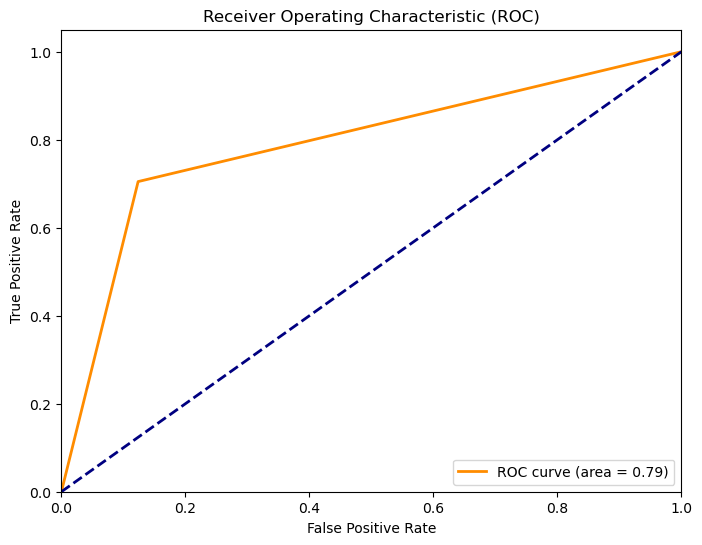

In [108]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

------------------------------ checking for test dataset --------------------------------------------

In [109]:
X_train.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
114,3,17.0,0,0,14.4583,0,0,0
874,2,28.0,1,0,24.0000,0,0,0


In [110]:
final_test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_male,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,0,1


In [111]:
final_test1 = final_test.drop(['Name','Sex','Embarked'],axis=1)

### we want to treat the null values present in the test set

In [112]:
final_test1.isnull().sum()

Pclass         0
Age           86
SibSp          0
Parch          0
Fare           1
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

<Axes: ylabel='Frequency'>

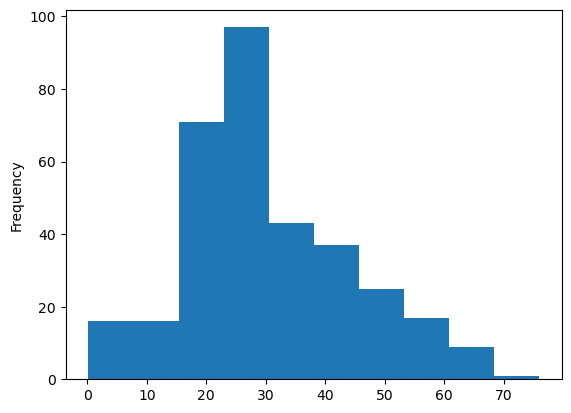

In [113]:
final_test1.Age.plot(kind = 'hist')

In [114]:
round(final_test1.Age.mean(),0)

30.0

In [115]:
final_test1['Age'] = final_test1.Age.fillna(round(final_test1.Age.mean(),0))

In [116]:
final_test1.shape

(418, 8)

In [117]:
final_test1.Fare.median()

14.4542

In [118]:
final_test1['Fare'] = final_test1.Fare.fillna(final_test1.Fare.median())

In [119]:
clf.predict(final_test1)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [124]:
clf.predict_proba(final_test1)

array([[0.88337548, 0.11662452],
       [0.70552579, 0.29447421],
       [0.88067628, 0.11932372],
       [0.91292881, 0.08707119],
       [0.42978171, 0.57021829],
       [0.85734289, 0.14265711],
       [0.29942312, 0.70057688],
       [0.79762719, 0.20237281],
       [0.27245664, 0.72754336],
       [0.94254166, 0.05745834],
       [0.92259727, 0.07740273],
       [0.68146719, 0.31853281],
       [0.0731331 , 0.9268669 ],
       [0.95446201, 0.04553799],
       [0.17973426, 0.82026574],
       [0.17174918, 0.82825082],
       [0.69918424, 0.30081576],
       [0.86156454, 0.13843546],
       [0.50438936, 0.49561064],
       [0.5434017 , 0.4565983 ],
       [0.77587102, 0.22412898],
       [0.81606909, 0.18393091],
       [0.06881699, 0.93118301],
       [0.34274979, 0.65725021],
       [0.12552775, 0.87447225],
       [0.97555462, 0.02444538],
       [0.03591139, 0.96408861],
       [0.86904957, 0.13095043],
       [0.63361741, 0.36638259],
       [0.94872796, 0.05127204],
       [0.

In [125]:
pd.DataFrame(clf.predict_proba(final_test1))

,0,1
0,0.883375,0.116625
1,0.705526,0.294474
2,0.880676,0.119324
3,0.912929,0.087071
4,0.429782,0.570218
...,...,...
413,0.922601,0.077399
414,0.078681,0.921319
415,0.944902,0.055098
416,0.922601,0.077399


In [185]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)
display(confusion_matrix(y_train,y_train_pred2))
display(confusion_matrix(y_test,y_test_pred2))
print(classification_report(y_train,y_train_pred2))
print(classification_report(y_test,y_test_pred2))

array([[97,  0],
       [ 2, 79]], dtype=int64)

array([[331, 121],
       [ 73, 188]], dtype=int64)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        97
           1       1.00      0.98      0.99        81

    accuracy                           0.99       178
   macro avg       0.99      0.99      0.99       178
weighted avg       0.99      0.99      0.99       178

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       452
           1       0.61      0.72      0.66       261

    accuracy                           0.73       713
   macro avg       0.71      0.73      0.72       713
weighted avg       0.74      0.73      0.73       713



In [189]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train,y_train)
y_train_pred3 = model3.predict(X_train)
y_test_pred3 = model3.predict(X_test)
display(confusion_matrix(y_train,y_train_pred3))
display(confusion_matrix(y_test,y_test_pred3))
print(classification_report(y_train,y_train_pred3))
print(classification_report(y_test,y_test_pred3))

array([[97,  0],
       [ 2, 79]], dtype=int64)

array([[345, 107],
       [ 61, 200]], dtype=int64)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        97
           1       1.00      0.98      0.99        81

    accuracy                           0.99       178
   macro avg       0.99      0.99      0.99       178
weighted avg       0.99      0.99      0.99       178

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       452
           1       0.65      0.77      0.70       261

    accuracy                           0.76       713
   macro avg       0.75      0.76      0.75       713
weighted avg       0.78      0.76      0.77       713



In [190]:
from sklearn.ensemble import AdaBoostClassifier

model4= AdaBoostClassifier()
model4.fit(X_train,y_train)
y_train_pred4=model4.predict(X_train)
y_test_pred4=model4.predict(X_test)
print(confusion_matrix(y_train,y_train_pred4))
print(confusion_matrix(y_test,y_test_pred4))
print(classification_report(y_train,y_train_pred4))
print(classification_report(y_test,y_test_pred4))

[[90  7]
 [10 71]]
[[358  94]
 [ 70 191]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        97
           1       0.91      0.88      0.89        81

    accuracy                           0.90       178
   macro avg       0.91      0.90      0.90       178
weighted avg       0.90      0.90      0.90       178

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       452
           1       0.67      0.73      0.70       261

    accuracy                           0.77       713
   macro avg       0.75      0.76      0.76       713
weighted avg       0.78      0.77      0.77       713



In [191]:
from sklearn.naive_bayes import GaussianNB

model4= GaussianNB()
model4.fit(X_train,y_train)
y_train_pred4=model4.predict(X_train)
y_test_pred4=model4.predict(X_test)
print(confusion_matrix(y_train,y_train_pred4))
print(confusion_matrix(y_test,y_test_pred4))
print(classification_report(y_train,y_train_pred4))
print(classification_report(y_test,y_test_pred4))

[[80 17]
 [15 66]]
[[342 110]
 [ 66 195]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        97
           1       0.80      0.81      0.80        81

    accuracy                           0.82       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.82      0.82      0.82       178

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       452
           1       0.64      0.75      0.69       261

    accuracy                           0.75       713
   macro avg       0.74      0.75      0.74       713
weighted avg       0.77      0.75      0.76       713



In [192]:
from sklearn.svm import SVC
model6= SVC()
model6.fit(X_train,y_train)
y_train_pred6=model6.predict(X_train)
y_test_pred6=model6.predict(X_test)
print(confusion_matrix(y_train,y_train_pred6))
print(confusion_matrix(y_test,y_test_pred6))
print(classification_report(y_train,y_train_pred6))
print(classification_report(y_test,y_test_pred6))

[[78 19]
 [42 39]]
[[368  84]
 [133 128]]
              precision    recall  f1-score   support

           0       0.65      0.80      0.72        97
           1       0.67      0.48      0.56        81

    accuracy                           0.66       178
   macro avg       0.66      0.64      0.64       178
weighted avg       0.66      0.66      0.65       178

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       452
           1       0.60      0.49      0.54       261

    accuracy                           0.70       713
   macro avg       0.67      0.65      0.66       713
weighted avg       0.69      0.70      0.69       713



In [205]:
output = pd.DataFrame(model3.predict(new_test))
output.columns = ['Survival']
output.Survival.replace({1:'Yes',0:'No'},inplace = True)
output.to_csv('final_submission.csv',index = False)

In [203]:
output

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0
